# MODEL EVALUATION NOTEBOOK
Felix A. Westphal
DLMDWME01

### Import

In [44]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, f1_score

### Parameter

In [45]:
FILE_PATH_DATASET_TEST_X = r"../data/processed/Dataset_Test_X.pkl"
FILE_PATH_DATASET_TEST_Y = r"../data/processed/Dataset_Test_Y.pkl"
FILE_PATH_TRAINED_MODEL = r"../models/gradient_boosting.pkl"

### Load Test Dataset and ML Model

In [46]:
with open(FILE_PATH_DATASET_TEST_X, 'rb') as file:
    X_test = pickle.load(file)
with open(FILE_PATH_DATASET_TEST_Y, 'rb') as file:
    y_test = pickle.load(file)
with open(FILE_PATH_TRAINED_MODEL, 'rb') as file:
    model = pickle.load(file)

### Prediction on Test Dataset

In [47]:
y_pred = model.predict(X_test)

### Confusion Matrix

In [48]:
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

### ROC Curve and AUC Score

In [49]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

### Further Performance Metrics

In [50]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fp_rate = fp / (fp + tn)
fn_rate = fn / (fn + tp)
tp_rate = tp / (tp + fn)

accuracy_test = (tp + tn) / (tp + tn + fp + fn)

### Print Output

In [51]:
print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy}")
print(f"False Positive Rate: {fp_rate}")
print(f"False Negative Rate: {fn_rate}")
print(f"True Positive Rate: {tp_rate}")
print(f"F1 Score: {f1}")
print(f"AUC: {auc}")

Confusion Matrix:
[[6012   37]
 [1442   83]]
Accuracy: 0.8047266965936097
False Positive Rate: 0.006116713506364688
False Negative Rate: 0.9455737704918032
True Positive Rate: 0.05442622950819672
F1 Score: 0.10091185410334345
AUC: 0.6423615880148188


### Plot Output

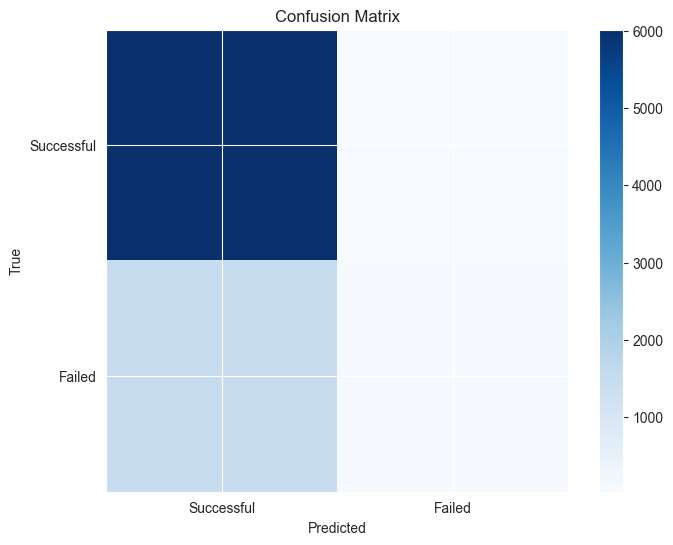

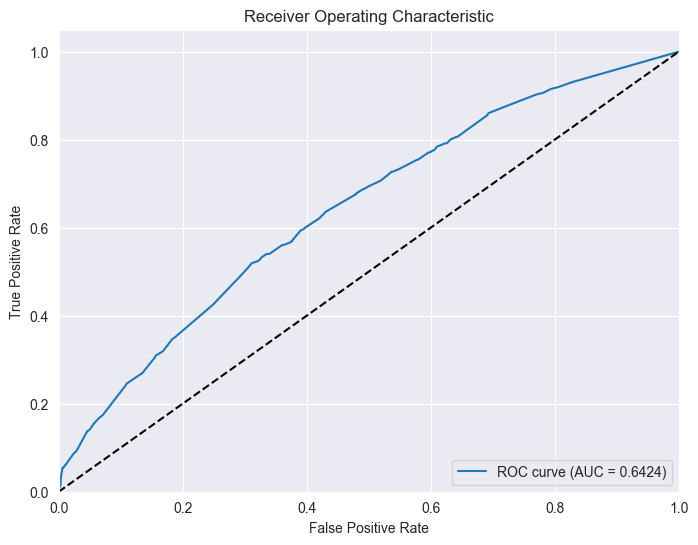

In [52]:
# --- Confusion Matrix Plot
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Successful", "Failed"])
plt.yticks([0, 1], ["Successful", "Failed"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- ROC Curve Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.4f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()